Scottie YANG Miaoyi

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 2b: 3D Scatter Plots and Rotation Matrices
## Task 1: Setup, Data Import and 3D Scatter Plots

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [8,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Import the Data
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Print the ndarray.

In [2]:
plotLab = np.genfromtxt("data/gauss_3d.csv", delimiter=",")
print(plotLab.shape)

(200, 3)


## Task 2: 3D graphing

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled. 
2. Use dots instead of a solid line.

<IPython.core.display.Javascript object>


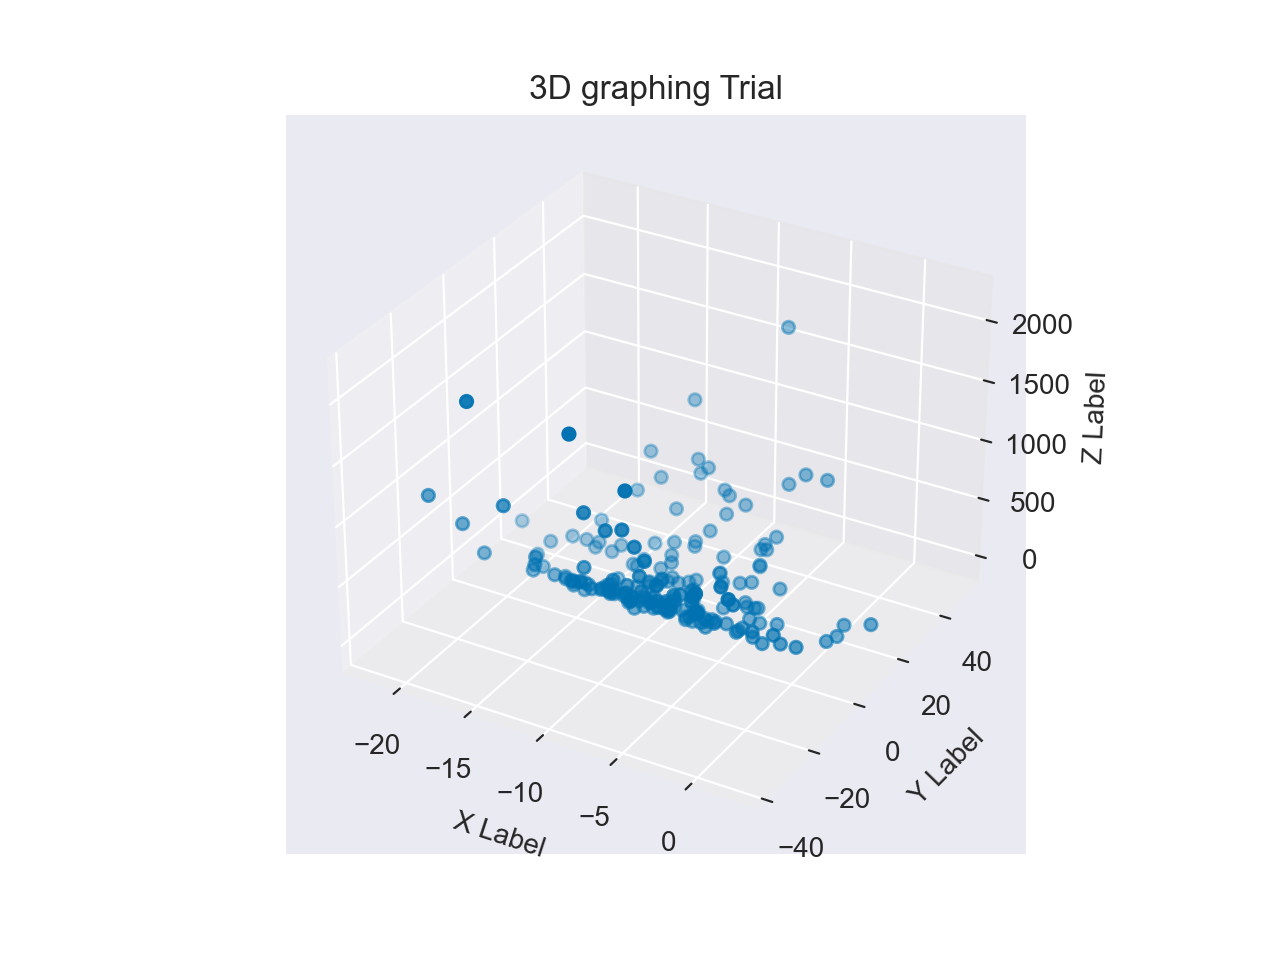

In [40]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plotLab[:,0],plotLab[:,1],plotLab[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title("3D graphing Trial")
plt.show()

## Task 2: Rotation

### 2a) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [10]:
num_points, num_feature = plotLab.shape
hcoordinate = np.ones((num_points, 1))
plotLab_h = np.hstack((plotLab, hcoordinate))

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

### 2b) Design a rotation matrix

1. Design a transformation matrix that rotates the dataset 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
  - Print your matrix


In [12]:
identityMatrix = np.eye(4)
rad = 30/180*np.pi
rotationMatrix = np.copy(identityMatrix)
rotationMatrix[0,0] = np.cos(rad)
rotationMatrix[0,2] = np.sin(rad)
rotationMatrix[1,2] = np.cos(rad)
rotationMatrix[2,0] = -np.sin(rad)

### 2c) Rotate data and Visualize Results in 2D

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and rotated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the rotated data in different colors.
  - <i>If you implemented a function in the previous lab, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

In [13]:
matmul_R = (rotationMatrix @ plotLab_h.T).T
print(matmul_R)

[[  35.1871    62.74985   74.566      1.     ]
 [   9.23057   52.93632   47.6095     1.     ]
 [  76.38707  147.83279  180.9895     1.     ]
 [ 290.41302  560.38061  615.1215     1.     ]
 [ 294.28354  503.24454  601.2295     1.     ]
 [ 468.25853  821.89956  984.524      1.     ]
 [ 407.46745  687.90733  817.783      1.     ]
 [ 138.68065  252.55294  308.177      1.     ]
 [ 228.19706  396.0694   475.1545     1.     ]
 [ 292.80881  558.37124  610.7215     1.     ]
 [  35.62976   65.84905   77.2615     1.     ]
 [ 316.63632  563.74169  678.5855     1.     ]
 [  73.07621  165.70571  172.071      1.     ]
 [  76.60948  146.77351  179.825      1.     ]
 [ 235.94774  401.61698  481.5625     1.     ]
 [ -10.03203   24.01052   14.5305     1.     ]
 [ -17.16677    0.90929  -10.089      1.     ]
 [  60.39226  124.66196  152.9015     1.     ]
 [ 117.71698  244.68829  257.2835     1.     ]
 [ -35.12216  -43.26736  -54.428      1.     ]
 [ 161.57751  332.36895  357.7585     1.     ]
 [  12.19238 

<IPython.core.display.Javascript object>


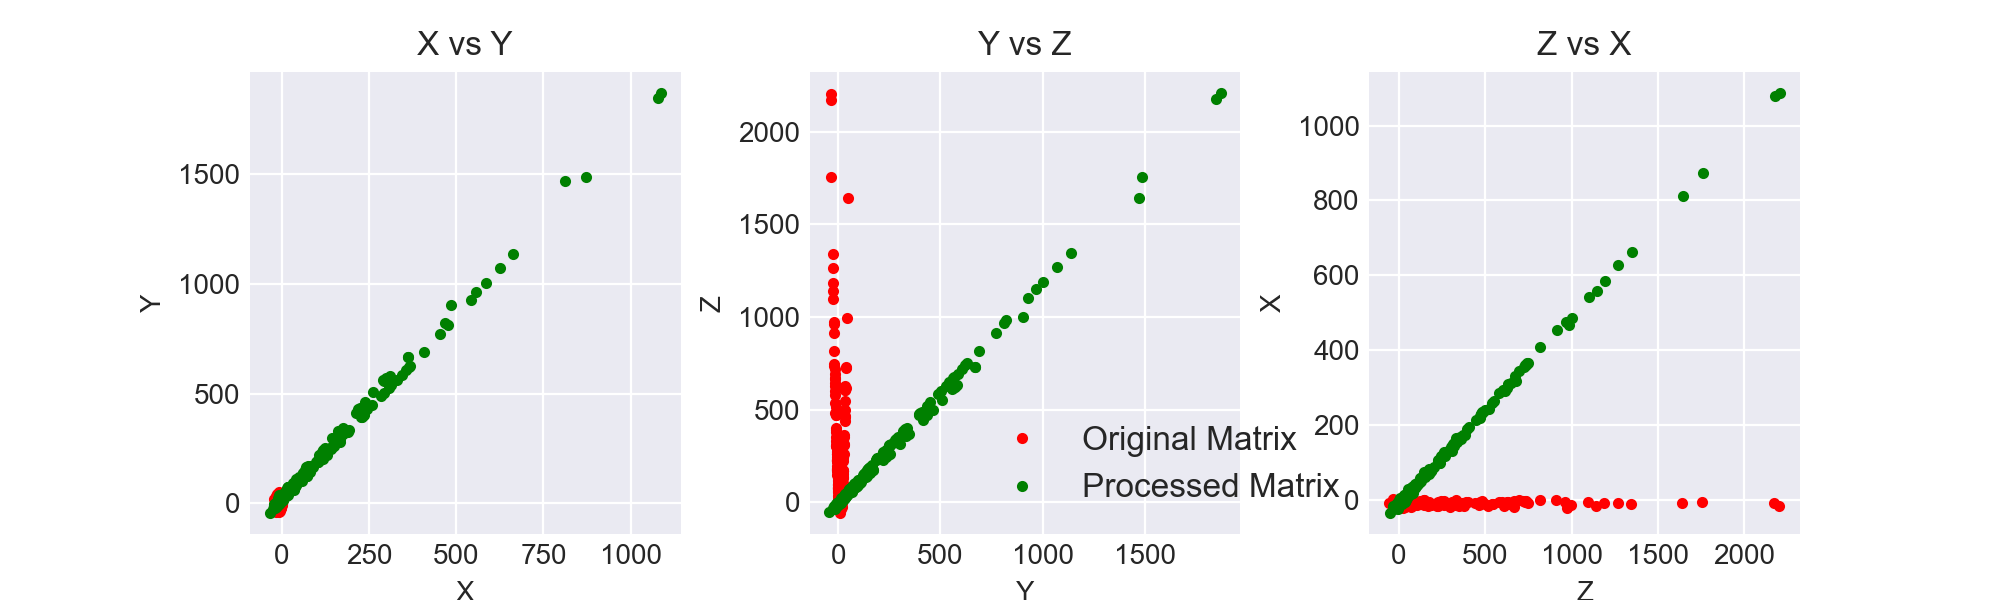

In [38]:
def plot_sets(originalMatrix = '', processedMatrix = ''):
    plt.figure(figsize=(10,3), constrained_layout=False)
    
    plt.subplot(1, 3, 1) # plot x-y
    plt.plot(originalMatrix[:,0],originalMatrix[:,1], 'r.')
    plt.plot(processedMatrix[:,0],processedMatrix[:,1], 'g.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('X vs Y')
        
    plt.subplot(1, 3, 2) # plot y-z
    plt.plot(originalMatrix[:,1],originalMatrix[:,2], 'r.')
    plt.plot(processedMatrix[:,1],processedMatrix[:,2], 'g.')
    plt.xlabel('Y')
    plt.ylabel('Z')
    plt.title('Y vs Z')

    plt.subplot(1, 3, 3) # plot z-x
    plt.plot(originalMatrix[:,2],originalMatrix[:,0], 'r.')
    plt.plot(processedMatrix[:,2],processedMatrix[:,0], 'g.')
    plt.xlabel('Z')
    plt.ylabel('X')
    plt.title('Z vs X')

    plt.subplots_adjust(wspace = 0.3, hspace = 0.01)
    plt.legend(('Original Matrix', 'Processed Matrix'), fontsize = 12, bbox_to_anchor=(0, 0.3))
    plt.show()
    
plot_sets(originalMatrix = plotLab_h, processedMatrix = matmul_R)


### 2d) Visualize Rotated Data in 3D

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled.  
2. Use dots instead of a solid line.
3. Graph the original dataset and rotated dataset on the same graph.

<IPython.core.display.Javascript object>


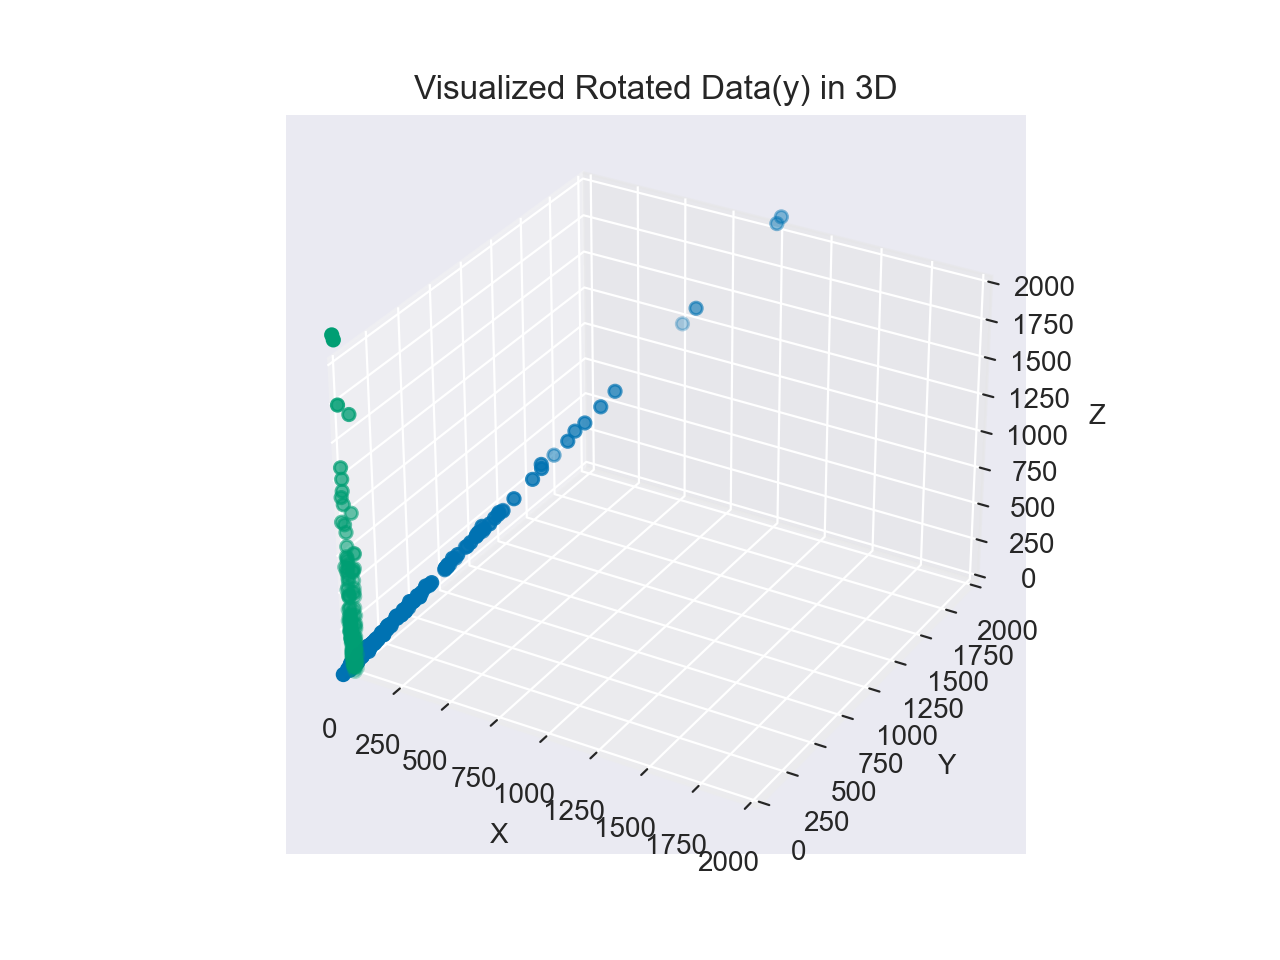

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matmul_R[:,0],matmul_R[:,1],matmul_R[:,2], 'r.')
ax.scatter(plotLab[:,0],plotLab[:,1],plotLab[:,2], 'g.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 2000])
ax.set_ylim([0, 2000])
ax.set_zlim([0, 2000])
ax.set_title("Visualized Rotated Data(y) in 3D")
plt.show()